In [1]:
import pandas as pd
import numpy as np
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq
import os
import json
from pathlib import Path
import pprint

In [2]:
from dotenv import load_dotenv
load_dotenv()

groq_key = os.getenv("groq_key")

data_path = os.getenv("data_path")
data_path = Path(data_path)

In [3]:
from eval import evaluate_multiclass_classification, get_best_diagnosis_match

In [4]:
experiment_name = 'noteText_exp_1'

In [5]:
experiment_df = pd.read_csv(data_path / f"{experiment_name}.csv")

Accuracy: 0.8140
Precision (Macro Avg): 0.7925
Recall (Macro Avg): 0.7628
F1 Score (Macro Avg): 0.7728

Classification Report:
               precision    recall  f1-score   support

    continue       0.80      0.62      0.70        13
 deprescribe       0.83      0.92      0.87        26
        stop       0.75      0.75      0.75         4

    accuracy                           0.81        43
   macro avg       0.79      0.76      0.77        43
weighted avg       0.81      0.81      0.81        43



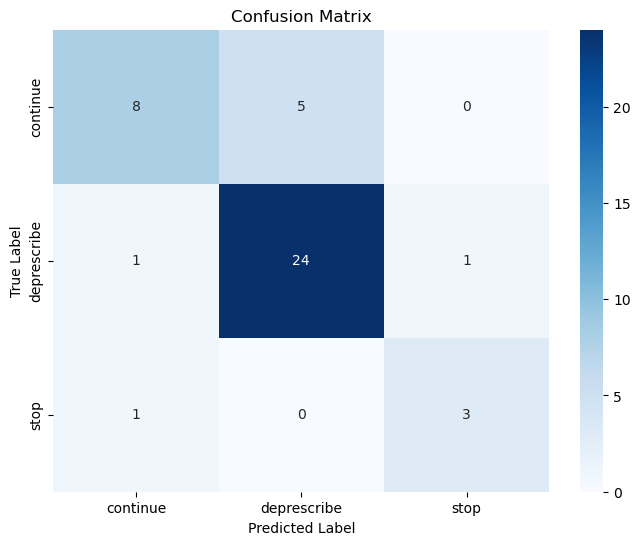

In [6]:
y_true = experiment_df['recommendation']
y_pred = experiment_df['ret_recommendation']
class_labels = ['continue', 'deprescribe', 'stop']

# Evaluate the model
metrics = evaluate_multiclass_classification(y_true, y_pred, class_labels)

In [6]:
experiment_df

,review_by,validated_by,key,reason,recommendation,diagnosis,GS_response,Note,token_usage,ret_recommendation,ret_reasoning,search_history_so_far,token_count_history
0,Ben,NaN,D6253A5CE371EA,example with gastrointestinal bleed should con...,continue,3-Upper GI Bleed,This patient has a history of a gastrointestin...,NaN,9298,continue,**Medication Recommendation Summary**\n\nBased...,"[{'diagnosis_boolean': '1', 'explanation': ""Th...","{'diagnosis_source_continue': 628, 'diagnosis_..."
1,Ben,NaN,DFAFED1811B871,example with a documented history of a GI blee...,continue,3-Upper GI Bleed,This patient has a history of a gastrointestin...,NaN,9718,continue,**Medication Recommendation Summary**\n\nBased...,"[{'diagnosis_boolean': '1', 'explanation': ""Th...","{'diagnosis_source_continue': 666, 'diagnosis_..."
2,Ben,NaN,D4865B8BBB294E,example with GI bleeding that occurred during ...,continue,3-Upper GI Bleed,GI bleeding developed during hospital stay and...,NaN,10362,continue,**Medication Recommendation Summary**\n\nBased...,"[{'diagnosis_boolean': '1', 'explanation': 'Th...","{'diagnosis_source_continue': 797, 'diagnosis_..."
3,Ben,NaN,D00F3A8D5F43B2,example with symptoms of heartburn (upper GI s...,deprescribe,9-Treated GERD,09/20/2023 inpatient nursing note mentions use...,NaN,8210,deprescribe,**Medication Recommendation Summary**\n\nBased...,"[{'diagnosis_boolean': '0', 'explanation': ""Th...","{'diagnosis_source_continue': 731, 'diagnosis_..."
4,Ben,NaN,DA15CCF42ACF8B,"Barrett's esophagus, continue PPI",continue,0-Barrett's Esophagus,Patient should continue lansoprazole 30mg ever...,NaN,8696,continue,**Medication Recommendation Summary**\n\nBased...,"[{'diagnosis_boolean': '0', 'explanation': ""Th...","{'diagnosis_source_continue': 602, 'diagnosis_..."
5,Ben,NaN,DFB07E6B8F0957,example with chronic NSAID use and pharmacist ...,continue,1-Chronic NSAID Use,Patient should stop lansoprazole 30mg twice da...,NaN,8002,deprescribe,**Medication Recommendation Summary**\n\nBased...,"[{'diagnosis_boolean': '0', 'explanation': ""Th...","{'diagnosis_source_continue': 597, 'diagnosis_..."
6,Ben,NaN,D1BD3665C06499,example where pt should be on due to history o...,continue,2-Severe GERD/Esophagitis,Patinet should continue omeprazole 40mg twice ...,NaN,10438,continue,**Medication Recommendation Summary**\n\nBased...,"[{'diagnosis_boolean': '0', 'explanation': ""Th...","{'diagnosis_source_continue': 660, 'diagnosis_..."
7,Ben,NaN,D068E26FFF9F43,example where pt came in on and no clear reaso...,deprescribe,10-No Diagnosis,Patient came in on lansoprazole 30mg. No clea...,NaN,5656,deprescribe,**Summary of Findings:**\n\nBased on the searc...,"[{'diagnosis_boolean': '0', 'explanation': ""Th...","{'diagnosis_source_continue': 665, 'diagnosis_..."
8,Ben,NaN,D0E44FD0BBD96F,example where pt came in on and no clear reaso...,deprescribe,9-Treated GERD,Patient was admitted on Lansoprazole 30mg dail...,NaN,9041,deprescribe,**Medication Recommendation Summary**\n\nBased...,"[{'diagnosis_boolean': '0', 'explanation': ""Th...","{'diagnosis_source_continue': 623, 'diagnosis_..."
9,Ben,NaN,D17AFAD1D7BB68,should stop PPI based on Fundoplication being ...,deprescribe,9-Treated GERD,Patient on home esomeprazole 40mg converted to...,breaks API due to JSON error,8925,deprescribe,**Medication Recommendation Summary**\n\nBased...,"[{'diagnosis_boolean': '0', 'explanation': ""Th...","{'diagnosis_source_continue': 605, 'diagnosis_..."
